In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#import dataset
df = pd.read_csv("PJMW_hourly.csv")

In [3]:
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [4]:
df.tail()

,Datetime,PJMW_MW
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0
143205,2018-01-02 00:00:00,7691.0


### Observation : We can see that from 31-12-2002 to 02-01-2018 data is available.

In [5]:
# shape of data
df.shape

(143206, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  143206 non-null  object 
 1   PJMW_MW   143206 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [7]:
# check for duplicate values
df.duplicated().sum()

0

In [8]:
df[df.duplicated()]

,Datetime,PJMW_MW


### Observation : No Duplicate Entries

In [9]:
#check for null values
df.isnull().sum()

Datetime    0
PJMW_MW     0
dtype: int64

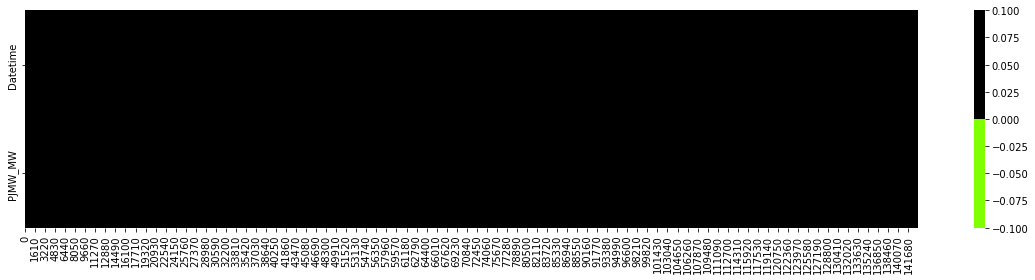

In [10]:
plt.figure(figsize=(20,4))
colors = ['#7FFF00','#000000']
sns.heatmap(df.isnull().T, cmap = sns.color_palette(colors))
plt.show()

### Observation : No Null values are available.

In [11]:
# Descriptive Analysis
df.describe()

,PJMW_MW
count,143206.000000
mean,5602.375089
std,979.142872
min,487.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


In [12]:
df.skew()

PJMW_MW    0.334853
dtype: float64

In [13]:
df.kurt()

PJMW_MW   -0.221456
dtype: float64

### Observation : 
1. The 'PJMW_MW' column has positive skewness
2. The 'PJMW_MW' column has negative kurtosis

Conclusion: The data is positive skewed, platykurtic and doesn't follow normal distribution

### Univariate Analysis

<AxesSubplot:>

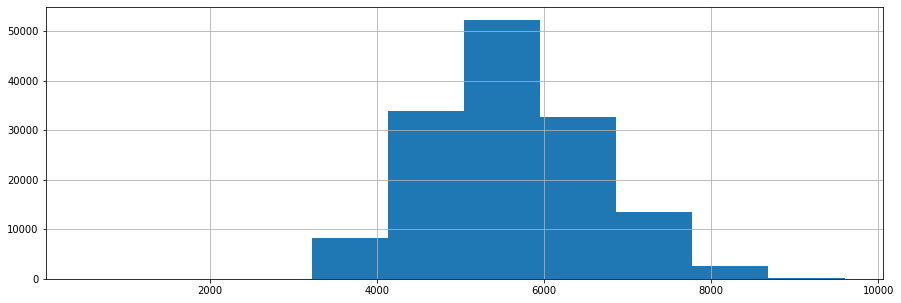

In [14]:
df['PJMW_MW'].hist(figsize=(15,5))

<AxesSubplot:xlabel='PJMW_MW', ylabel='Density'>

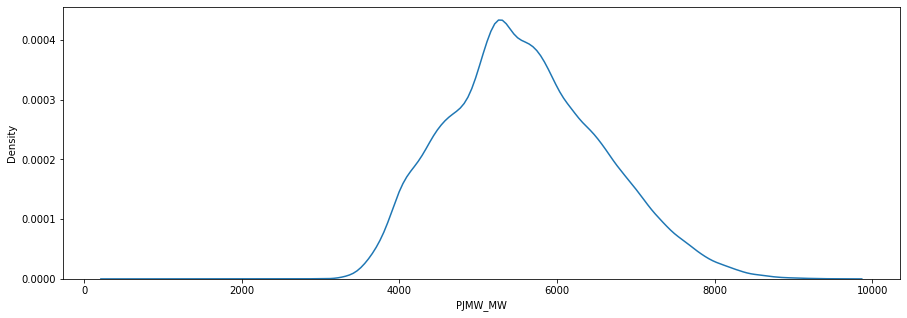

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(df['PJMW_MW'], hist=False)

### Observation : Frequency is continious and As the number of Consumption increases, there is no gradual drop in the frequency of that number of consumption found to be decreasing.

### Feature Extraction for Visualization

In [16]:
data = pd.read_csv("PJMW_hourly.csv",index_col="Datetime",parse_dates=True)
data

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0
...,...
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0


In [17]:
### check for null values
data.isnull().sum()

PJMW_MW    0
dtype: int64

In [18]:
### check for duplicate entries
data.index.duplicated().sum()

4

In [19]:
data[data.index.duplicated(keep=False)]

,PJMW_MW
Datetime,
2014-11-02 02:00:00,4613.0
2014-11-02 02:00:00,4571.0
2015-11-01 02:00:00,3927.0
2015-11-01 02:00:00,3832.0
2016-11-06 02:00:00,4114.0
2016-11-06 02:00:00,4089.0
2017-11-05 02:00:00,4042.0
2017-11-05 02:00:00,3984.0


### Observation : we found 4 duplicate entries.

In [20]:
data.reset_index(inplace=True)
data

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
...,...,...
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0


In [21]:
data=data.groupby('Datetime').mean().reset_index()

In [22]:
data.set_index('Datetime',inplace=True)

In [23]:
data[data.index.duplicated()]

,PJMW_MW
Datetime,


### Observation : No duplicate entries.

In [24]:
data["Year"]=data.index.year
data["Month"]=data.index.month
data["Day"]=data.index.day
data["Hour"]=data.index.hour
data["Quarter"]=data.index.quarter
data["Day of week"]=data.index.dayofweek
data["Day of year"]=data.index.dayofyear
data

,PJMW_MW,Year,Month,Day,Hour,Quarter,Day of week,Day of year
Datetime,,,,,,,,
2002-04-01 01:00:00,4374.0,2002,4,1,1,2,0,91
2002-04-01 02:00:00,4306.0,2002,4,1,2,2,0,91
2002-04-01 03:00:00,4322.0,2002,4,1,3,2,0,91
2002-04-01 04:00:00,4359.0,2002,4,1,4,2,0,91
2002-04-01 05:00:00,4436.0,2002,4,1,5,2,0,91
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,6545.0,2018,8,2,20,3,3,214
2018-08-02 21:00:00,6496.0,2018,8,2,21,3,3,214
2018-08-02 22:00:00,6325.0,2018,8,2,22,3,3,214


In [25]:
data.reset_index(inplace=True)

In [26]:
def dayname(x):
    if x['Day of week']==0:
        DayName = 'Mon'
    if x['Day of week']==1:
        DayName = 'Tue'
    if x['Day of week']==2:
        DayName = 'Wed'
    if x['Day of week']==3:
        DayName = 'Thu'
    if x['Day of week']==4:
        DayName = 'Fri'
    if x['Day of week']==5:
        DayName = 'Sat'
    if x['Day of week']==6:
        DayName = 'Sun'
    return DayName

In [27]:
data['Day Name'] = data.apply(dayname,axis=1)
data.head()

,Datetime,PJMW_MW,Year,Month,Day,Hour,Quarter,Day of week,Day of year,Day Name
0,2002-04-01 01:00:00,4374.0,2002,4,1,1,2,0,91,Mon
1,2002-04-01 02:00:00,4306.0,2002,4,1,2,2,0,91,Mon
2,2002-04-01 03:00:00,4322.0,2002,4,1,3,2,0,91,Mon
3,2002-04-01 04:00:00,4359.0,2002,4,1,4,2,0,91,Mon
4,2002-04-01 05:00:00,4436.0,2002,4,1,5,2,0,91,Mon


In [28]:
from datetime import date
import holidays

def check_holiday(x):
    us_holidays = holidays.UnitedStates()
    if (x['Datetime'] in us_holidays):
        Holiday = 1
    else:
        Holiday = 0
    return Holiday

In [29]:
data['Holiday'] = data.apply(check_holiday,axis=1)
data.head()

,Datetime,PJMW_MW,Year,Month,Day,Hour,Quarter,Day of week,Day of year,Day Name,Holiday
0,2002-04-01 01:00:00,4374.0,2002,4,1,1,2,0,91,Mon,0
1,2002-04-01 02:00:00,4306.0,2002,4,1,2,2,0,91,Mon,0
2,2002-04-01 03:00:00,4322.0,2002,4,1,3,2,0,91,Mon,0
3,2002-04-01 04:00:00,4359.0,2002,4,1,4,2,0,91,Mon,0
4,2002-04-01 05:00:00,4436.0,2002,4,1,5,2,0,91,Mon,0


In [30]:
def Season(x):
    if x['Month'] in [12,1,2]:
        season = "Winter"
    elif x['Month'] in [3,4,5] :
        season = "Spring"
    elif x['Month'] in [6,7,8] :
        season = "Summer"
    else:
        season = "Autum"
    return season

In [31]:
#data.drop('Datetime', axis =1 , inplace= True)
data['Season'] = data.apply(Season,axis=1)
data.head(70)

,Datetime,PJMW_MW,Year,Month,Day,Hour,Quarter,Day of week,Day of year,Day Name,Holiday,Season
0,2002-04-01 01:00:00,4374.0,2002,4,1,1,2,0,91,Mon,0,Spring
1,2002-04-01 02:00:00,4306.0,2002,4,1,2,2,0,91,Mon,0,Spring
2,2002-04-01 03:00:00,4322.0,2002,4,1,3,2,0,91,Mon,0,Spring
3,2002-04-01 04:00:00,4359.0,2002,4,1,4,2,0,91,Mon,0,Spring
4,2002-04-01 05:00:00,4436.0,2002,4,1,5,2,0,91,Mon,0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2002-04-03 18:00:00,5781.0,2002,4,3,18,2,2,93,Wed,0,Spring
66,2002-04-03 19:00:00,6009.0,2002,4,3,19,2,2,93,Wed,0,Spring
67,2002-04-03 20:00:00,6317.0,2002,4,3,20,2,2,93,Wed,0,Spring
68,2002-04-03 21:00:00,6220.0,2002,4,3,21,2,2,93,Wed,0,Spring


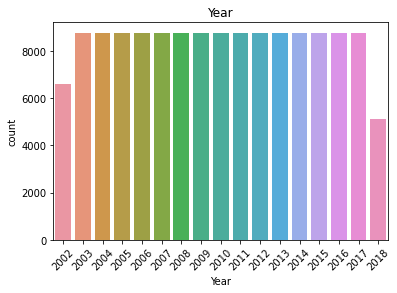

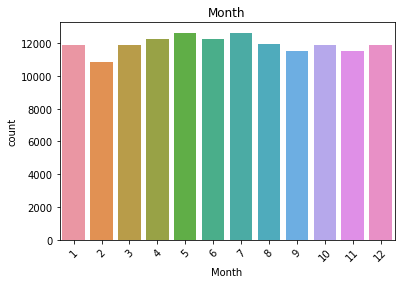

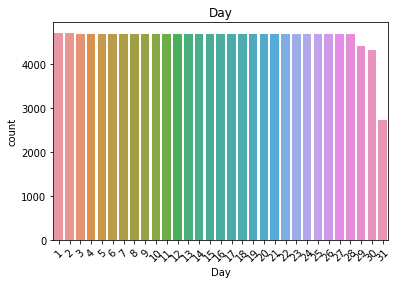

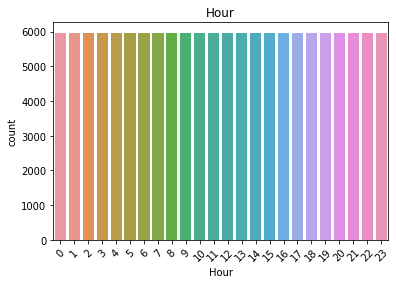

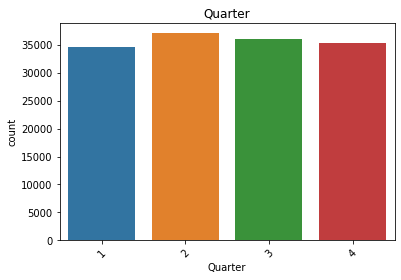

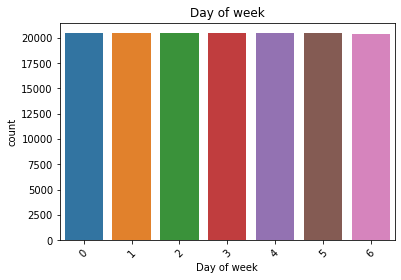

In [32]:
for col in ['Year','Month','Day','Hour','Quarter','Day of week']:
    sns.countplot(data[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

### Observation :
1. Year - as data present from dec 2002 so there are less values in 2002 and for 2018 only jan month values avilable so less count.
2. Month - As year no missing values.
3. Day - No missing values and for 29,30,31 values less beacuse leap year or month differencing.
4. Hour - All data present.
5. Day of week - All data present.

In [33]:
outliners=[]
def detect_outliners(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliners.append(i)
    return outliners

In [34]:
outliner_pt=detect_outliners(data["PJMW_MW"])

In [35]:
len(outliner_pt)

298

### Observation : There are few outliner available we will try to remove outliner.

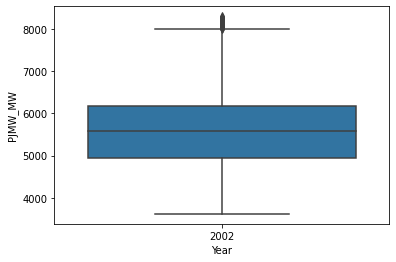

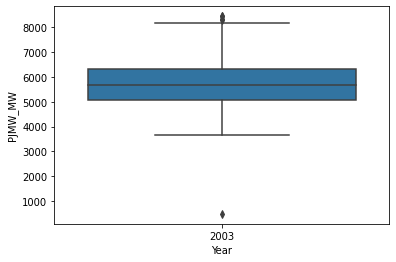

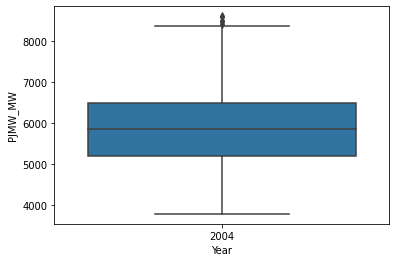

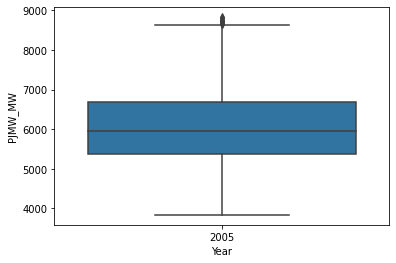

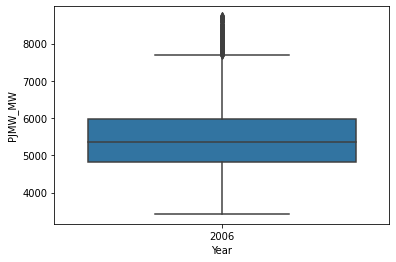

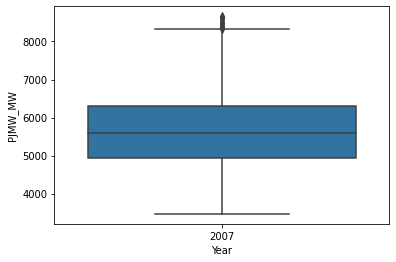

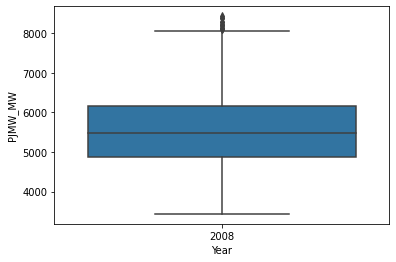

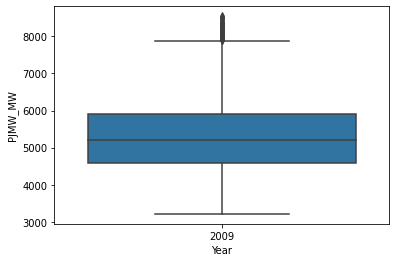

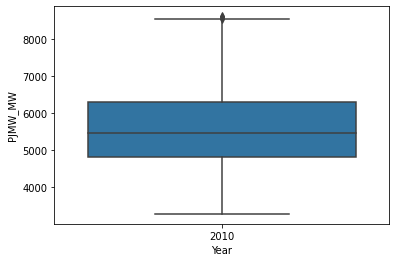

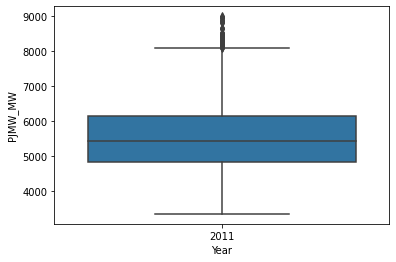

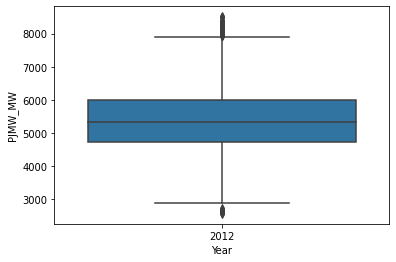

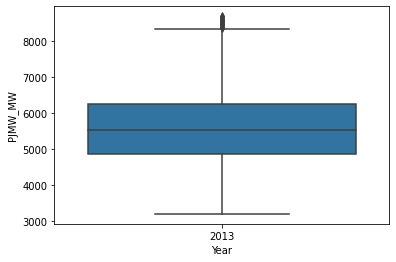

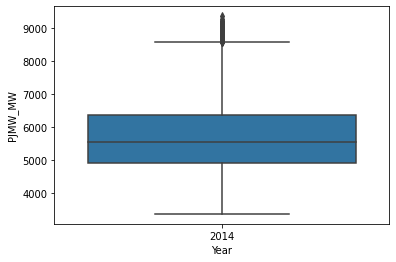

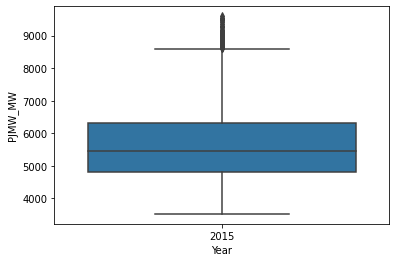

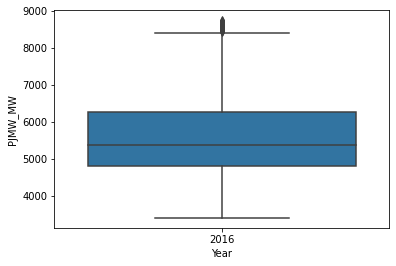

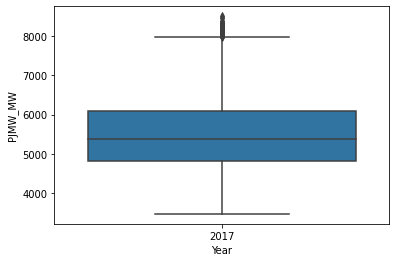

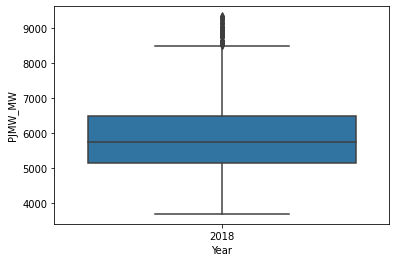

In [36]:
for col in range(2002,2019):
    col_year=data.loc[data['Year']==col]
    sns.boxplot(x=col_year['Year'],y=col_year['PJMW_MW'])
    plt.show()

In [37]:
df_year = data.groupby('Year').agg({"PJMW_MW" : "mean"}).reset_index()

In [38]:
for col in range(2002,2019):
    col_year=data.loc[data['Year']==col]
    Q1 = np.percentile(col_year['PJMW_MW'], 25, interpolation = 'midpoint')
    Q3 = np.percentile(col_year['PJMW_MW'], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    s=1.5*IQR
    LB = Q1 - s
    UB = Q3 + s
    val=df_year.loc[df_year['Year']==col]
    ulval=val['PJMW_MW'].values[0]
    data.loc[data['PJMW_MW'] > UB,'PJMW_MW'] = ulval
    data.loc[data['PJMW_MW'] < LB,'PJMW_MW'] = ulval

<AxesSubplot:xlabel='Year', ylabel='PJMW_MW'>

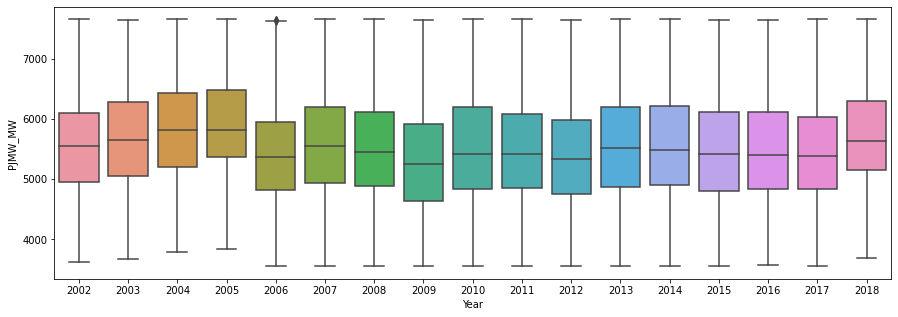

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data['Year'],y=data['PJMW_MW'])

### Observation : Most of the outliners removed.

<AxesSubplot:xlabel='Year'>

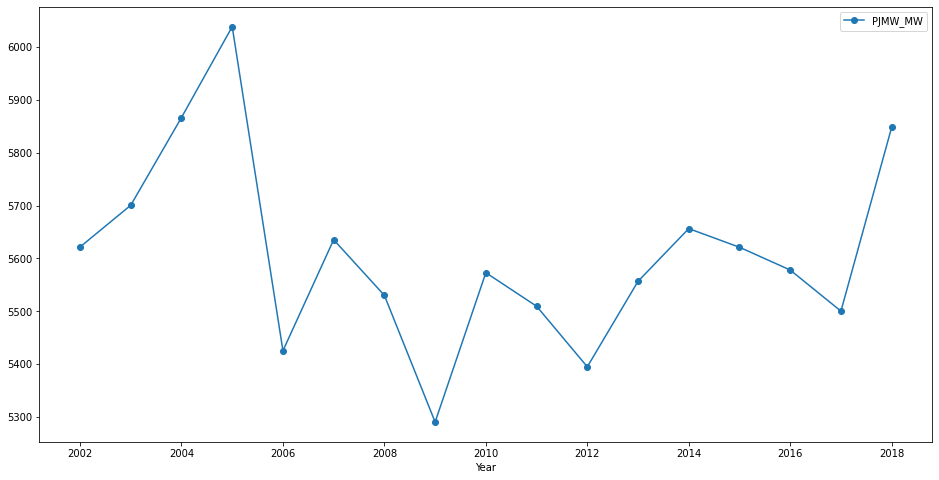

In [40]:
df_year.plot(kind ='line',x = 'Year', y = 'PJMW_MW', figsize = (16,8), marker = 'o')

### What is energy consumption on Hourly, Daily, Weekly, Monthly and Yearly Basis?

Text(0.5, 1.0, 'Quarterly')

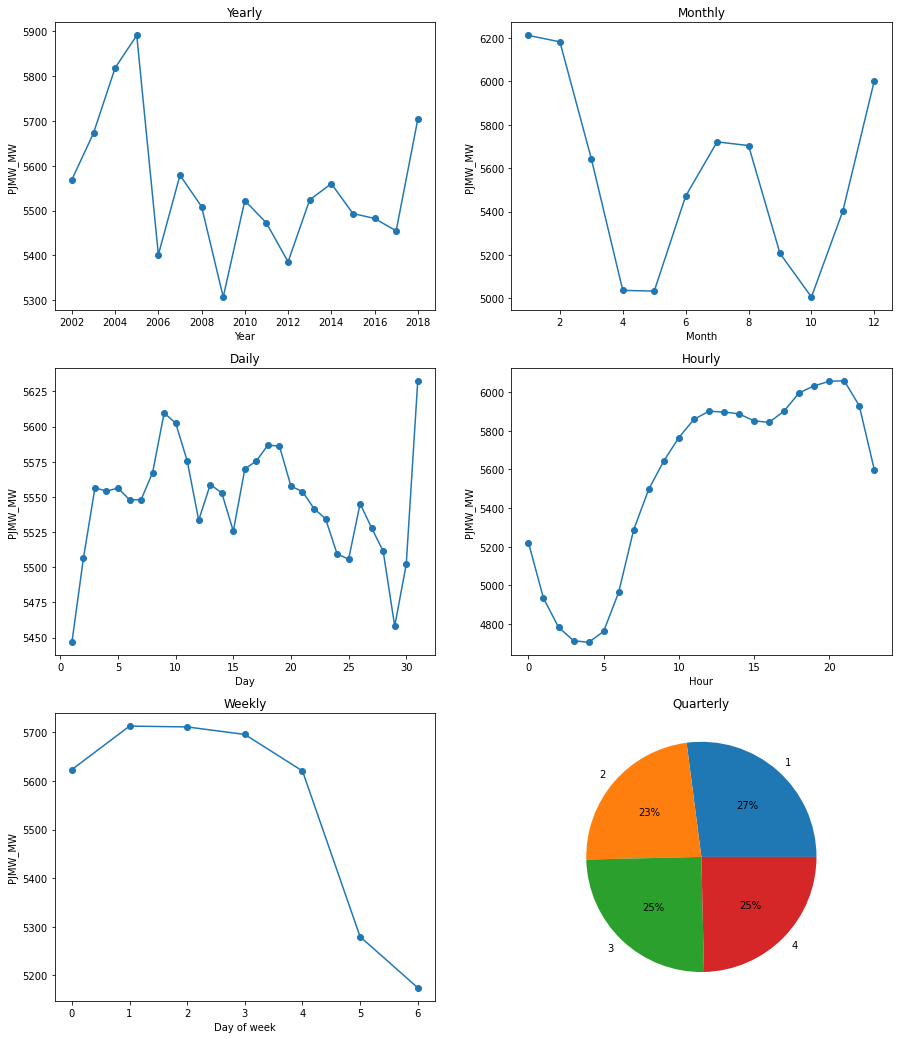

In [41]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
### energy consumption on yearly basis
df_year = data.groupby('Year').agg({"PJMW_MW" : "mean"}).reset_index()
ax[0][0].plot(df_year['Year'],df_year['PJMW_MW'],marker = 'o')
ax[0][0].set_title('Yearly')
ax[0][0].set_xlabel('Year')
ax[0][0].set_ylabel('PJMW_MW')
### energy consumption on Monthly basis
df_month = data.groupby('Month').agg({"PJMW_MW" : "mean"}).reset_index()
ax[0][1].plot(df_month['Month'],df_month['PJMW_MW'],marker = 'o')
ax[0][1].set_title('Monthly')
ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('PJMW_MW')
### energy consumption on Daily Basis
df_day = data.groupby('Day').agg({"PJMW_MW" : "mean"}).reset_index()
ax[1][0].plot(df_day['Day'],df_day['PJMW_MW'],marker = 'o')
ax[1][0].set_title('Daily')
ax[1][0].set_xlabel('Day')
ax[1][0].set_ylabel('PJMW_MW')
### energy consumption on Hourly
df_hour = data.groupby('Hour').agg({"PJMW_MW" : "mean"}).reset_index()
ax[1][1].plot(df_hour['Hour'],df_hour['PJMW_MW'],marker = 'o')
ax[1][1].set_title('Hourly')
ax[1][1].set_xlabel('Hour')
ax[1][1].set_ylabel('PJMW_MW')
### energy consumption on weekly basis
df_week = data.groupby('Day of week').agg({"PJMW_MW" : "mean"}).reset_index()
ax[2][0].plot(df_week['Day of week'],df_week['PJMW_MW'],marker = 'o')
ax[2][0].set_title('Weekly')
ax[2][0].set_xlabel('Day of week')
ax[2][0].set_ylabel('PJMW_MW')
### Quater wise Average
df_quarter = data.groupby('Quarter').agg({"PJMW_MW" : "mean"}).reset_index()
ax[2][1].pie(df_quarter['PJMW_MW'], labels=df_quarter['Quarter'],autopct='%.0f%%')
ax[2][1].set_title('Quarterly')

### Observation : 
1. there is sudden increase in use of energy in 2004-05 then it drops in 2009.
2. In Jan and Dec Month high consumption and drops in April, May and Oct Months.
3. On day 1,2 less energy consumption and on 31st day increase in energy consumption.
4. We can see that avg. Maximum Consumption is between 7.00 AM to 21.00 PM.

<AxesSubplot:xlabel='Season', ylabel='PJMW_MW'>

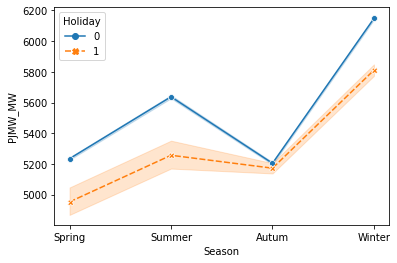

In [42]:
sns.lineplot(x=data['Season'],y=data['PJMW_MW'],hue=data['Holiday'],markers=True,style=data['Holiday'])

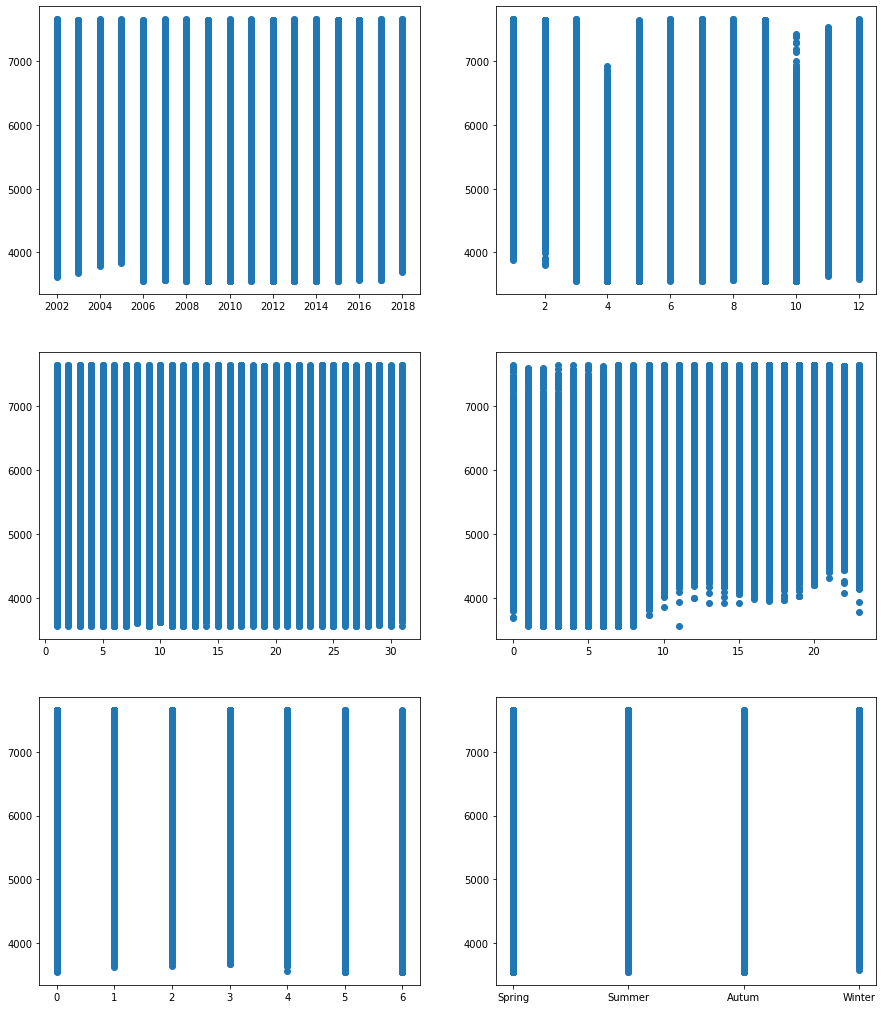

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
ax[0][0].scatter(x=data['Year'],y=data['PJMW_MW'])
ax[0][1].scatter(x=data['Month'],y=data['PJMW_MW'])
ax[1][0].scatter(x=data['Day'],y=data['PJMW_MW'])
ax[1][1].scatter(x=data['Hour'],y=data['PJMW_MW'])
ax[2][0].scatter(x=data['Day of week'],y=data['PJMW_MW'])
ax[2][1].scatter(x=data['Season'],y=data['PJMW_MW'])

In [44]:
data.to_csv('Final Data with features.csv')

### Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

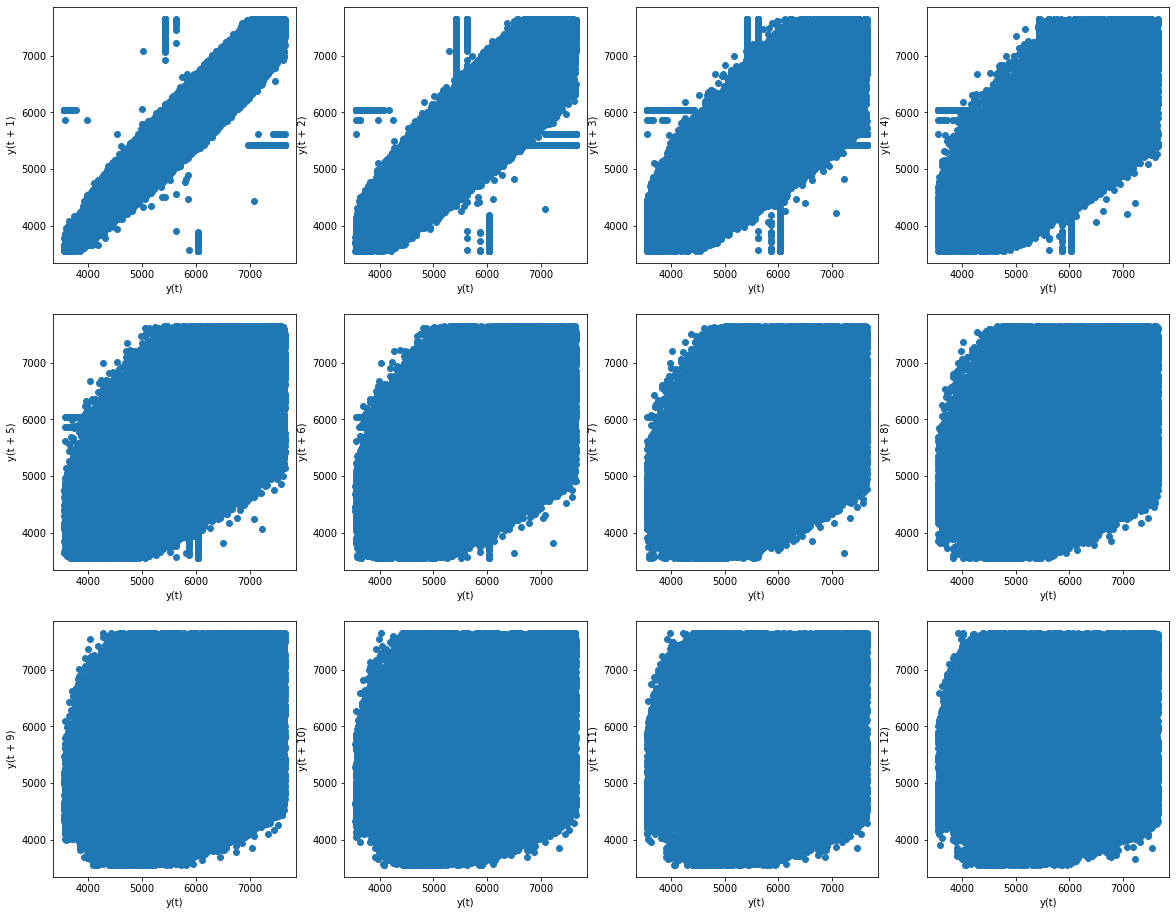

In [45]:
from pandas.plotting import lag_plot
fig, axes = plt.subplots(figsize=(20,16), ncols=4, nrows=3)

lag_plot(data.PJMW_MW, lag=1, ax=axes[0,0])
lag_plot(data.PJMW_MW, lag=2, ax=axes[0,1])
lag_plot(data.PJMW_MW, lag=3, ax=axes[0,2])
lag_plot(data.PJMW_MW, lag=4, ax=axes[0,3])
lag_plot(data.PJMW_MW, lag=5, ax=axes[1,0])
lag_plot(data.PJMW_MW, lag=6, ax=axes[1,1])
lag_plot(data.PJMW_MW, lag=7, ax=axes[1,2])
lag_plot(data.PJMW_MW, lag=8, ax=axes[1,3])
lag_plot(data.PJMW_MW, lag=9, ax=axes[2,0])
lag_plot(data.PJMW_MW, lag=10,ax=axes[2,1])
lag_plot(data.PJMW_MW, lag=11,ax=axes[2,2])
lag_plot(data.PJMW_MW, lag=12,ax=axes[2,3])

### Observation : Our data is linear mostly linear and it shows positive autocorrelation with the previous lag values.

### Time Series Decomposition

### trends in energy consumption around hours of the day, holidays, or long term trends

#### Trend around hours of the day

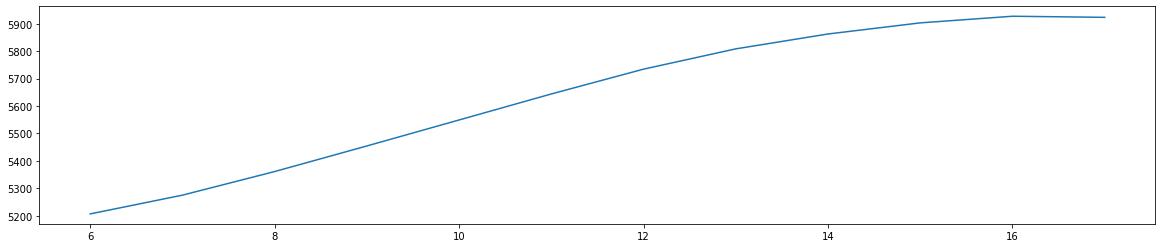

In [46]:
decompose_ts_add = seasonal_decompose(df_hour.PJMW_MW, model='multiplicative',period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(20,4))
    decompose_ts_add.trend.plot()
    plt.show()

#### Observation : There is upward trend for hours of the day.

#### Trend around holidays

In [47]:
holiday_data=pd.read_csv('Final Data with features.csv')
holiday_data.drop('Unnamed: 0',axis=1,inplace=True)
holiday_data.head()

,Datetime,PJMW_MW,Year,Month,Day,Hour,Quarter,Day of week,Day of year,Day Name,Holiday,Season
0,2002-04-01 01:00:00,4374.0,2002,4,1,1,2,0,91,Mon,0,Spring
1,2002-04-01 02:00:00,4306.0,2002,4,1,2,2,0,91,Mon,0,Spring
2,2002-04-01 03:00:00,4322.0,2002,4,1,3,2,0,91,Mon,0,Spring
3,2002-04-01 04:00:00,4359.0,2002,4,1,4,2,0,91,Mon,0,Spring
4,2002-04-01 05:00:00,4436.0,2002,4,1,5,2,0,91,Mon,0,Spring


In [48]:
holiday_data.shape

(143202, 12)

In [49]:
holiday_data=holiday_data.loc[holiday_data['Holiday']==1]
print(holiday_data.shape)

(4320, 12)


In [50]:
df_holiday = holiday_data.groupby('Year').agg({"PJMW_MW" : "mean"}).reset_index()

In [51]:
df_holiday.set_index('Year',inplace=True)

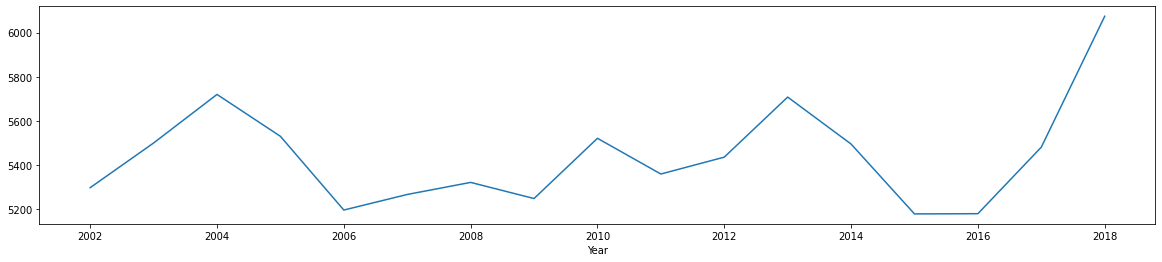

In [52]:
decompose_ts_add = seasonal_decompose(df_holiday.PJMW_MW, model='multiplicative',period=1)
with plt.rc_context():
    plt.rc("figure", figsize=(20,4))
    decompose_ts_add.trend.plot()
    plt.show()

#### Observation : There is No trend for holiday data.

#### Summer trends are very different than winter trends.

In [53]:
summer_data=pd.read_csv('Final Data with features.csv')
summer_data.drop('Unnamed: 0',axis=1,inplace=True)
summer_data.head()

,Datetime,PJMW_MW,Year,Month,Day,Hour,Quarter,Day of week,Day of year,Day Name,Holiday,Season
0,2002-04-01 01:00:00,4374.0,2002,4,1,1,2,0,91,Mon,0,Spring
1,2002-04-01 02:00:00,4306.0,2002,4,1,2,2,0,91,Mon,0,Spring
2,2002-04-01 03:00:00,4322.0,2002,4,1,3,2,0,91,Mon,0,Spring
3,2002-04-01 04:00:00,4359.0,2002,4,1,4,2,0,91,Mon,0,Spring
4,2002-04-01 05:00:00,4436.0,2002,4,1,5,2,0,91,Mon,0,Spring


In [54]:
summer_data.shape

(143202, 12)

In [55]:
summer_data=summer_data.loc[summer_data['Season'] == 'Summer']
print(summer_data.shape)

(36841, 12)


In [56]:
df_summer = summer_data.groupby('Year').agg({"PJMW_MW" : "mean"}).reset_index()

In [57]:
df_summer.set_index('Year',inplace=True)

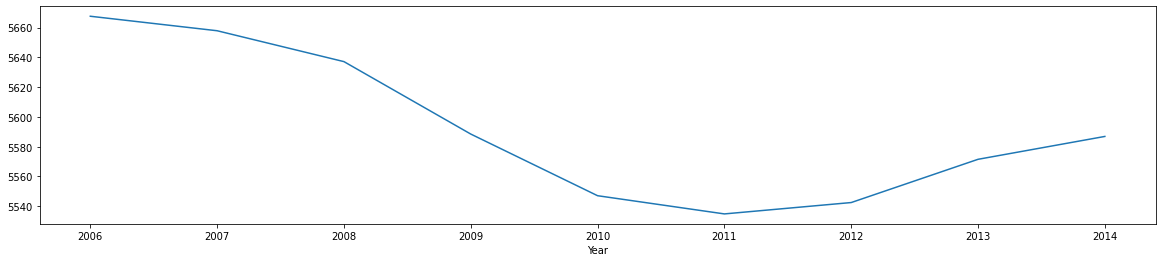

In [58]:
decompose_ts_add = seasonal_decompose(df_summer.PJMW_MW, model='multiplicative',period=8)
with plt.rc_context():
    plt.rc("figure", figsize=(20,4))
    decompose_ts_add.trend.plot()
    plt.show()

In [59]:
winter_data=pd.read_csv('Final Data with features.csv')
winter_data.drop('Unnamed: 0',axis=1,inplace=True)
winter_data.head()

,Datetime,PJMW_MW,Year,Month,Day,Hour,Quarter,Day of week,Day of year,Day Name,Holiday,Season
0,2002-04-01 01:00:00,4374.0,2002,4,1,1,2,0,91,Mon,0,Spring
1,2002-04-01 02:00:00,4306.0,2002,4,1,2,2,0,91,Mon,0,Spring
2,2002-04-01 03:00:00,4322.0,2002,4,1,3,2,0,91,Mon,0,Spring
3,2002-04-01 04:00:00,4359.0,2002,4,1,4,2,0,91,Mon,0,Spring
4,2002-04-01 05:00:00,4436.0,2002,4,1,5,2,0,91,Mon,0,Spring


In [60]:
winter_data=winter_data.loc[winter_data['Season'] == 'Winter']
print(winter_data.shape)

(34655, 12)


In [61]:
df_winter = winter_data.groupby('Year').agg({"PJMW_MW" : "mean"}).reset_index()

In [62]:
df_winter.set_index('Year',inplace=True)

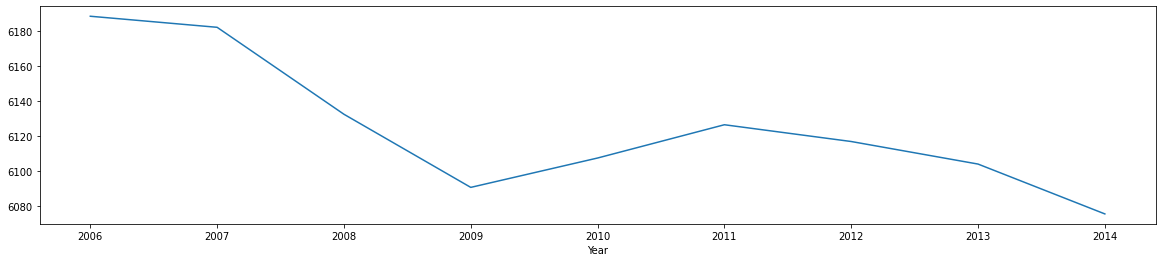

In [63]:
decompose_ts_add = seasonal_decompose(df_winter.PJMW_MW, model='multiplicative',period=8)
with plt.rc_context():
    plt.rc("figure", figsize=(20,4))
    decompose_ts_add.trend.plot()
    plt.show()

#### Observation : We can sae that there is no trend for summer but in winter there is downward trend.

#### Additive Seasonal Decomposition

In [64]:
df_year.set_index('Year',inplace=True)

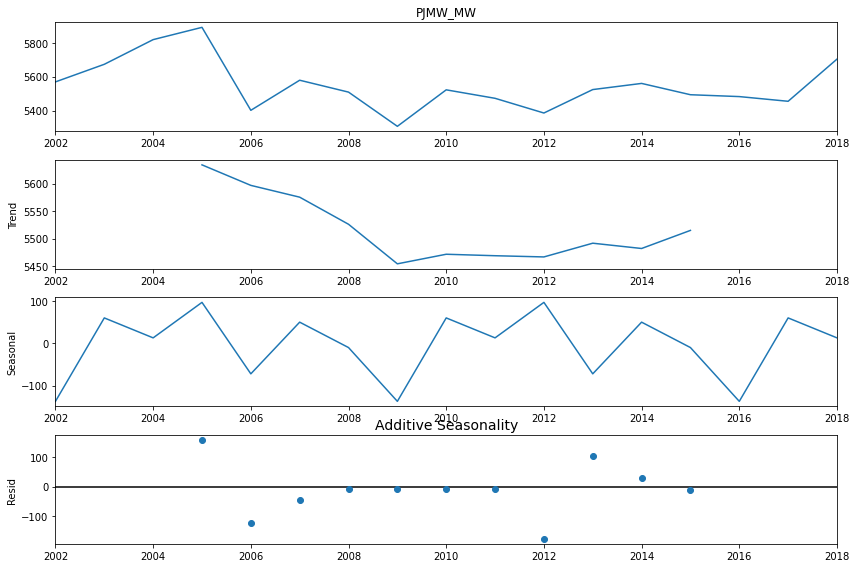

In [65]:
### Year wise 
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df_year.PJMW_MW, model='additive',period=7)
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    decompose_ts_add.plot()
    plt.title('Additive Seasonality', fontsize=14)
    plt.show()

### Observation :
1. There is no trend
2. There is sesonality in data. It Varies from +100 to -100 with the mean 0.
3. Residual - It is the noise pattern of the time series data for each year, which was not captured by the two components -  Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

In [66]:
df_month.set_index('Month',inplace=True)

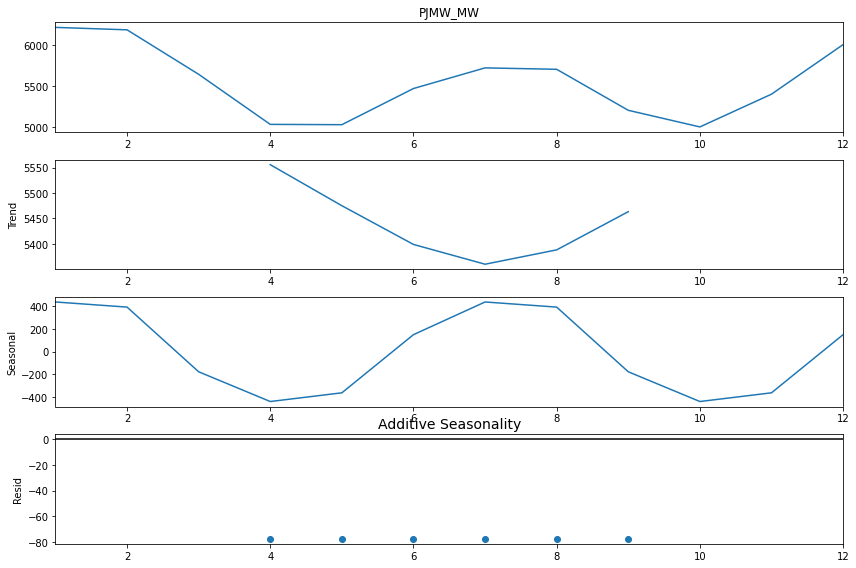

In [67]:
### Month wise 
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df_month.PJMW_MW, model='additive',period=6)
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    decompose_ts_add.plot()
    plt.title('Additive Seasonality', fontsize=14)
    plt.show()

### Observation :
1. There is no trend
2. There is sesonality in data. It Varies from +400 to -400 with the mean 0.
3. Residual - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

In [68]:
df_hour.set_index('Hour',inplace=True)

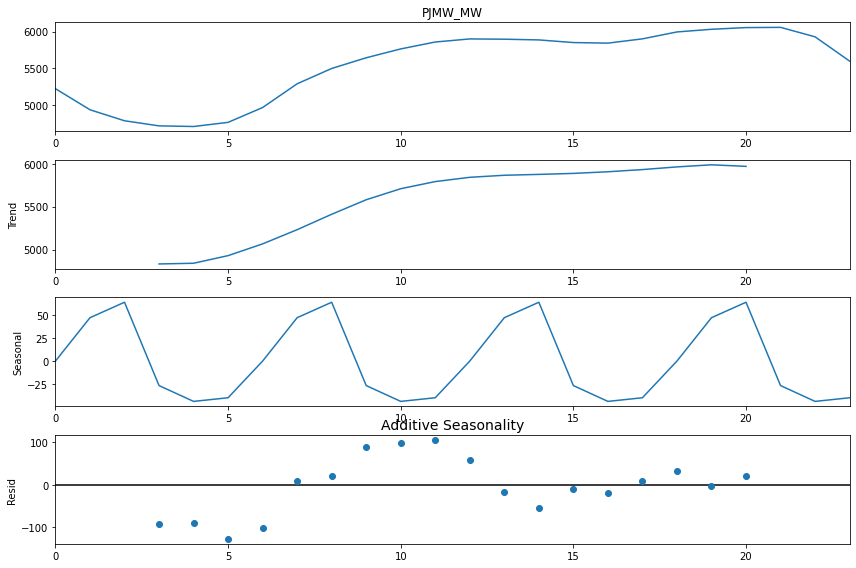

In [69]:
### Hour wise 
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df_hour.PJMW_MW, model='additive',period=6)
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    decompose_ts_add.plot()
    plt.title('Additive Seasonality', fontsize=14)
    plt.show()

### Observation :
1. There is Upward trend.
2. There is sesonality in data. It Varies from +50 to -25 with the mean 0.
3. Residual - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

In [70]:
df_week.set_index('Day of week',inplace=True)

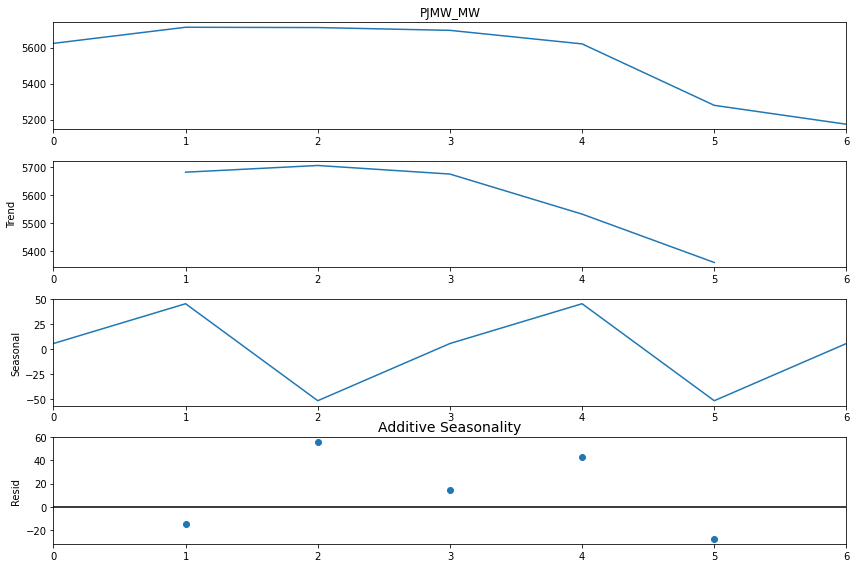

In [71]:
### weak wise 
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df_week.PJMW_MW, model='additive',period=3)
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    decompose_ts_add.plot()
    plt.title('Additive Seasonality', fontsize=14)
    plt.show()

#### Multiplicative Seasonal Decomposition

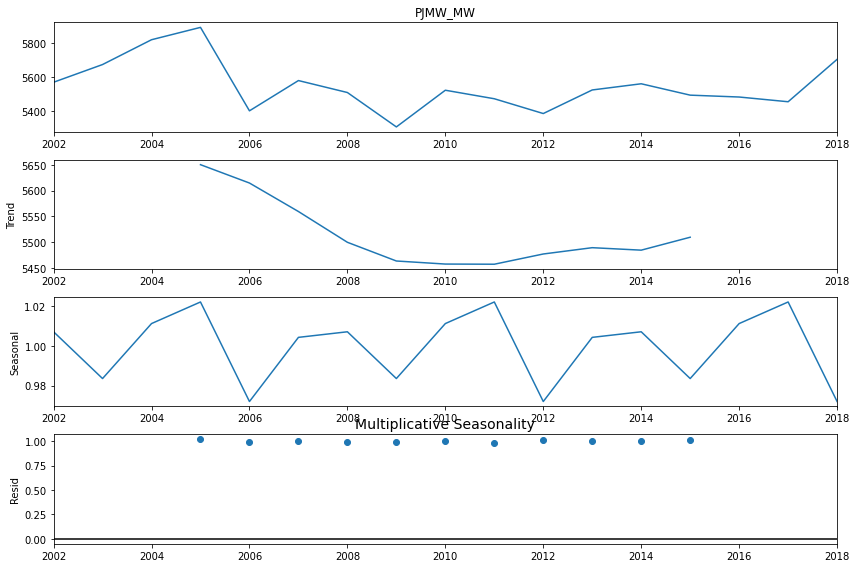

In [72]:
decompose_ts_add = seasonal_decompose(df_year.PJMW_MW, model='multiplicative',period=6)
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    decompose_ts_add.plot()
    plt.title('Multiplicative Seasonality', fontsize=14)
    plt.show()

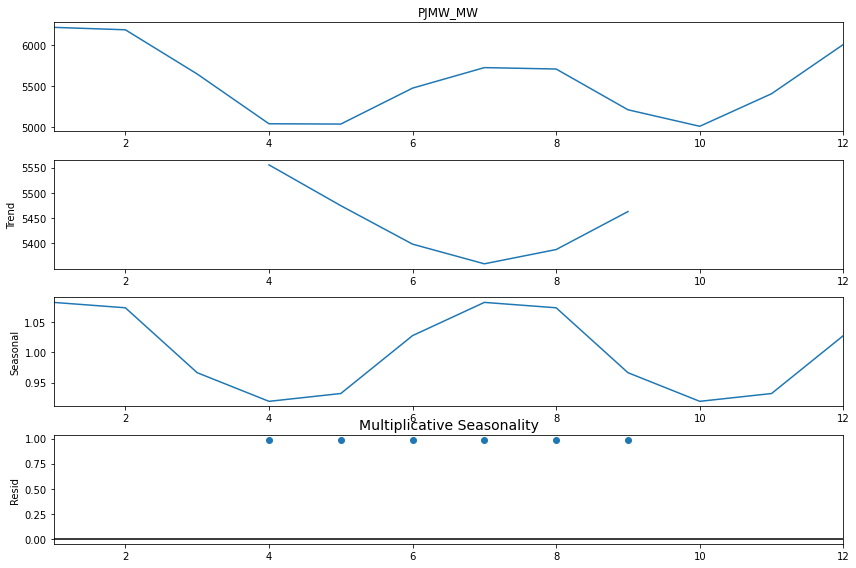

In [73]:
decompose_ts_add = seasonal_decompose(df_month.PJMW_MW, model='multiplicative',period=6)
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    decompose_ts_add.plot()
    plt.title('Multiplicative Seasonality', fontsize=14)
    plt.show()

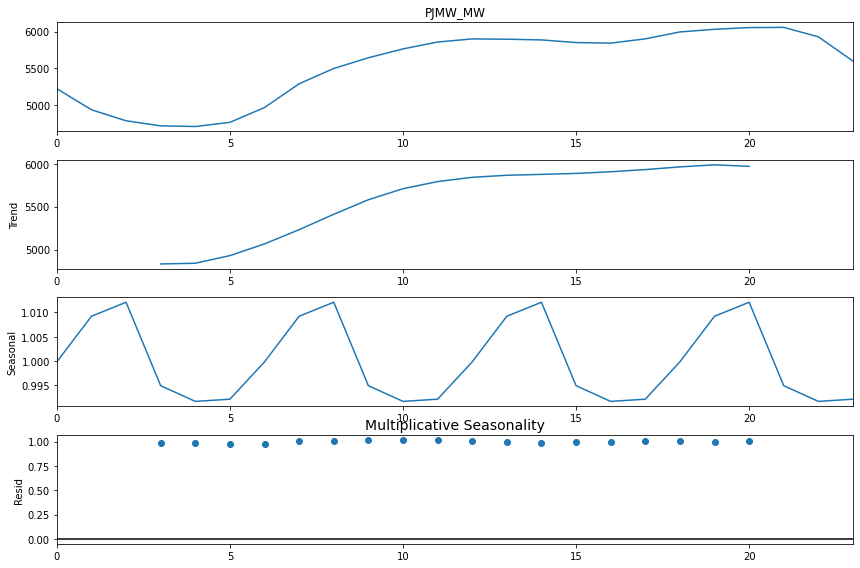

In [74]:
decompose_ts_add = seasonal_decompose(df_hour.PJMW_MW, model='multiplicative',period=6)
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    decompose_ts_add.plot()
    plt.title('Multiplicative Seasonality', fontsize=14)
    plt.show()

### Observation: As we can see there is sesonality in the time series Data.

### ACF Plots and PACF Plots

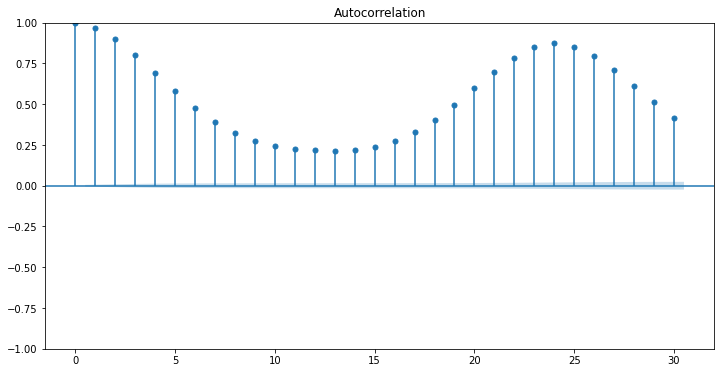

In [91]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(df.PJMW_MW,lags=30)
    plt.show()

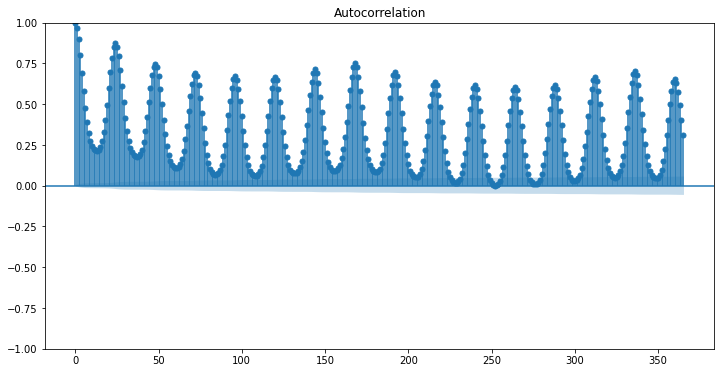

In [93]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(df.PJMW_MW,lags=365)
    plt.show()

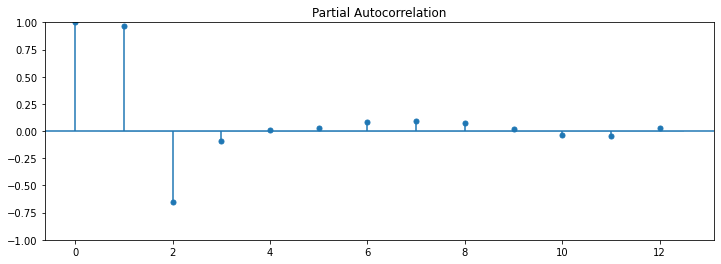

In [96]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df.PJMW_MW,lags=12)
    plt.show()

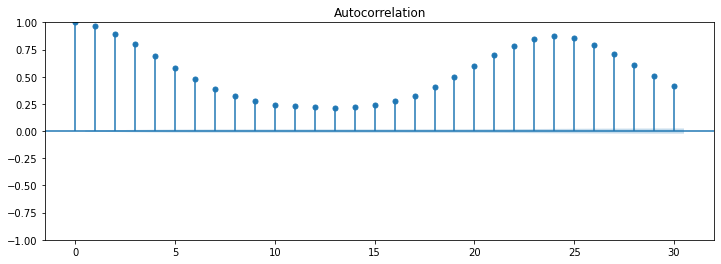

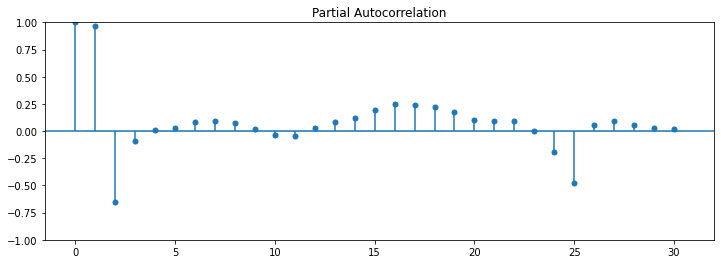

In [97]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.PJMW_MW,lags=30)
    tsa_plots.plot_pacf(df.PJMW_MW,lags=30)
    plt.show()

### Resampling & Interpolation

In [145]:
### downsampling with respect to day
data=pd.read_csv('Final Data.csv',index_col='Datetime',parse_dates=True)
downsampled_day = data.copy()
downsampled_day = downsampled_day.resample('D').mean()
print(downsampled_day.head())

                PJMW_MW
Datetime               
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000


In [146]:
downsampled_day.to_csv('Daywise Consumption Data.csv')

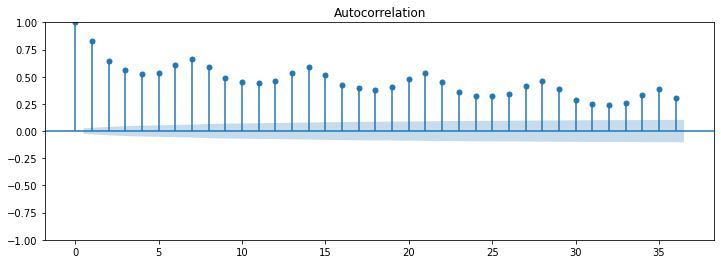

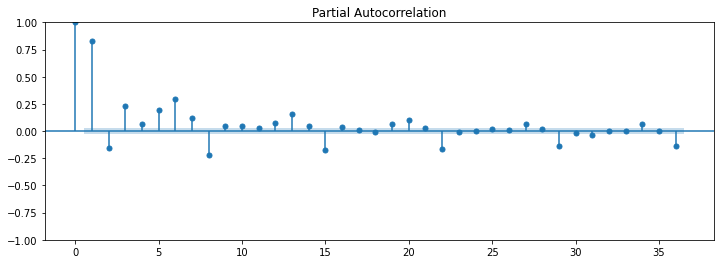

In [147]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(downsampled_day.PJMW_MW,lags=36)
    tsa_plots.plot_pacf(downsampled_day.PJMW_MW,lags=36, method = "ols")
    plt.show()

### Autoregressive Integrated Moving Averages (ARIMA)

### Assumptions of ARIMA model
1. Data should be stationary – by stationary it means that the properties of the series doesn’t depend on the time when it is captured. A white noise series and series with cyclic behavior can also be considered as stationary series.
2. Data should be univariate – ARIMA works on a single variable. Auto-regression is all about regression with the past values.

### Test of Stationarity

In [148]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(16,6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['PJMW_MW'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(np.round(dfoutput,3))

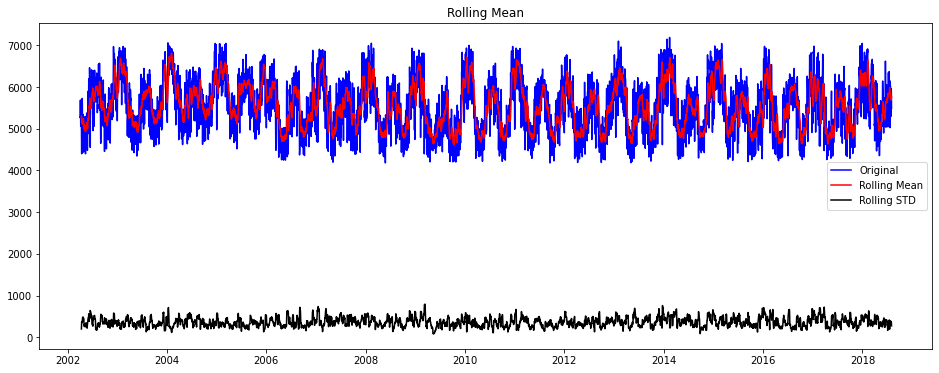

Results of Dickey Fuller Test:
Test Statistic                   -7.357
p-value                           0.000
#Lags Used                       33.000
Number of Observations Used    5935.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [149]:
PJMW_MW= pd.DataFrame()
PJMW_MW['PJMW_MW'] = downsampled_day[['PJMW_MW']]
test_stationarity(PJMW_MW)

In [150]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series)  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [151]:
adf_test(PJMW_MW)

Reject the null hypothesis
Data is stationary


### Differencing

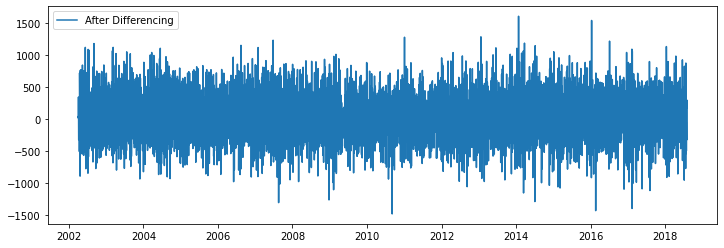

In [152]:
differencing = PJMW_MW - PJMW_MW.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

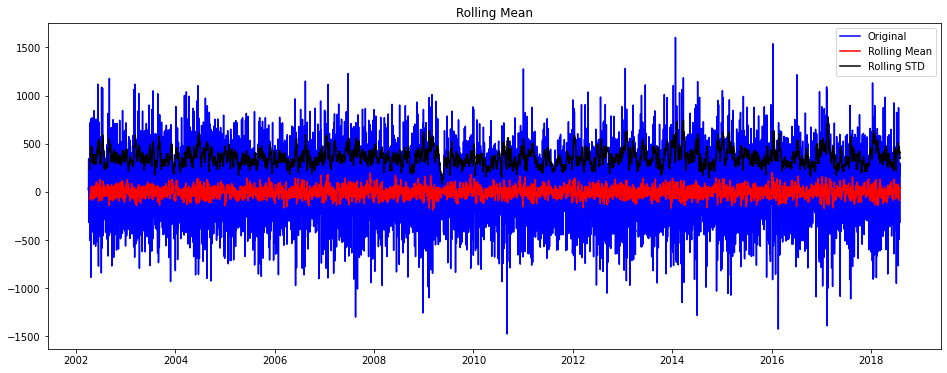

Results of Dickey Fuller Test:
Test Statistic                  -14.229
p-value                           0.000
#Lags Used                       34.000
Number of Observations Used    5933.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [153]:
test_stationarity(differencing)

### Seasonal Differencing

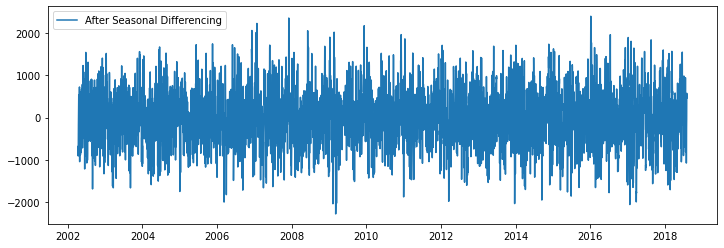

In [154]:
seasonal_differencing = PJMW_MW - PJMW_MW.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

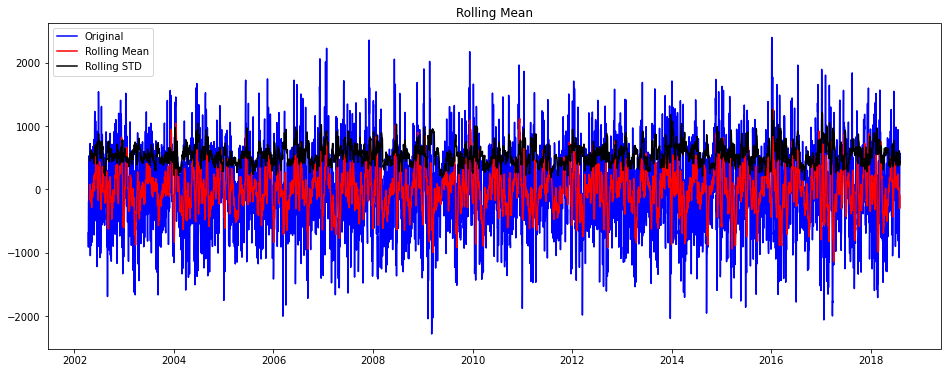

Results of Dickey Fuller Test:
Test Statistic                  -12.092
p-value                           0.000
#Lags Used                       34.000
Number of Observations Used    5922.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [155]:
test_stationarity(seasonal_differencing)

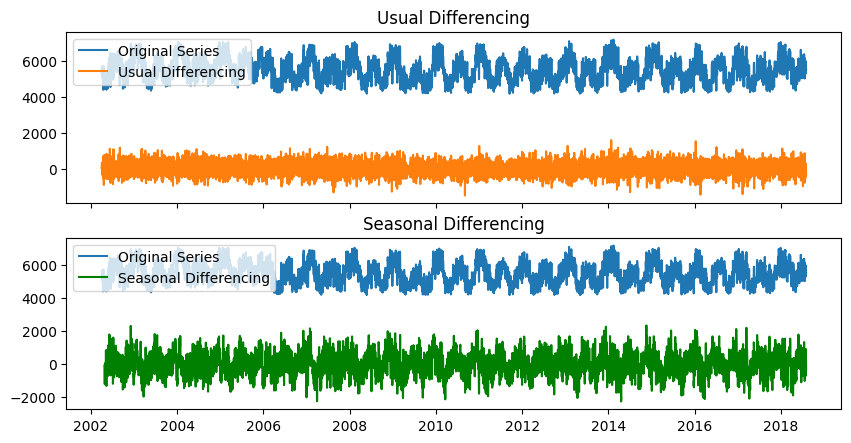

In [156]:
fig,ax = plt.subplots(2,1,figsize=(10,5),dpi=100,sharex=True)
data=PJMW_MW.PJMW_MW
ax[0].plot(data[:],label='Original Series')
ax[0].plot(data[:].diff(1),label='Usual Differencing')
ax[0].set_title('Usual Differencing')
ax[0].legend(loc='upper left',fontsize=10)

ax[1].plot(data[:],label='Original Series')
ax[1].plot(data[:].diff(24).dropna(),label='Seasonal Differencing',color='green')
ax[1].set_title('Seasonal Differencing')
ax[1].legend(loc='upper left',fontsize=10)
plt.legend(loc='upper left',fontsize=10)
plt.show()

Text(0.5, 1.0, 'PACF of Differencing Series')

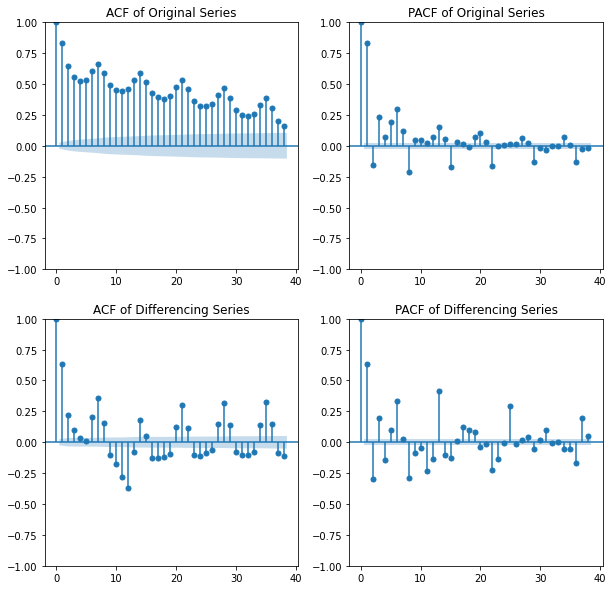

In [157]:
import statsmodels.graphics.tsaplots as tsa_plots
fig,ax=plt.subplots(2,2,figsize=(10,10))
tsa_plots.plot_acf(data,ax=ax[0,0])
ax[0,0].set_title('ACF of Original Series')
tsa_plots.plot_pacf(data,ax=ax[0,1])
ax[0,1].set_title('PACF of Original Series')

tsa_plots.plot_acf(data.diff(12).dropna(),ax=ax[1,0])
ax[1,0].set_title('ACF of Differencing Series')
tsa_plots.plot_pacf(data.diff(12).dropna(),ax=ax[1,1])
ax[1,1].set_title('PACF of Differencing Series')